<a href="https://colab.research.google.com/github/LolBoi14/Computer_vision/blob/main/Banks_failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files

# Ouverture du fichier 'Failed_bank_list'
uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfailures = pd.read_csv(filename,sep=",",encoding='latin-1')

Saving failed_bank_list.csv to failed_bank_list.csv


In [ ]:
dfailures.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,The Santa Anna National Bank,Santa Anna,TX,5520,Coleman County State Bank,27-Jun-25,10549
1,Pulaski Savings Bank,Chicago,IL,28611,Millennium Bank,17-Jan-25,10548
2,First National Bank of Lindsay,Lindsay,OK,4134,First Bank & Trust Co.,18-Oct-24,10547
3,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",26-Apr-24,10546
4,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,3-Nov-23,10545


In [ ]:
# Ouverture du fichier 'Etats_US'

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dstates = pd.read_excel(filename)

Saving Etats_US.xlsx to Etats_US.xlsx


In [ ]:
dfailures.isna().sum()

,0
Bank Name,0
City,0
State,0
Cert,0
Acquiring Institution,0
Closing Date,0
Fund,0


In [ ]:
print(dfailures.duplicated().sum())

0


In [ ]:
dfailures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bank Name               572 non-null    object
 1   City                    572 non-null    object
 2   State                   572 non-null    object
 3   Cert                    572 non-null    int64 
 4   Acquiring Institution   572 non-null    object
 5   Closing Date            572 non-null    object
 6   Fund                    572 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.4+ KB


In [ ]:
dfailures.columns = dfailures.columns.str.strip()

In [ ]:
dfailures['Closing Date'] = pd.to_datetime(dfailures['Closing Date'])

/tmp/ipython-input-3188201951.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfailures['Closing Date'] = pd.to_datetime(dfailures['Closing Date'])


In [ ]:
dstates.head()

,Code,Etat
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,Californie


In [ ]:
dfailures = dfailures.rename(columns={'State':'Code'})

In [ ]:
dfailures = dfailures.merge(dstates,on='Code',how='left')

In [ ]:
dfailures.head()

,Bank Name,City,Code,Cert,Acquiring Institution,Closing Date,Fund,Etat
0,The Santa Anna National Bank,Santa Anna,TX,5520,Coleman County State Bank,2025-06-27,10549,Texas
1,Pulaski Savings Bank,Chicago,IL,28611,Millennium Bank,2025-01-17,10548,Illinois
2,First National Bank of Lindsay,Lindsay,OK,4134,First Bank & Trust Co.,2024-10-18,10547,Oklahoma
3,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",2024-04-26,10546,Pennsylvanie
4,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,2023-11-03,10545,Iowa


In [ ]:
dfailures.value_counts()

,,,,,,,,count
Bank Name,City,Code,Cert,Acquiring Institution,Closing Date,Fund,Etat,
ebank,Atlanta,GA,34682,"Stearns Bank, N.A.",2009-08-21,10107,Georgie,1
1st American State Bank of Minnesota,Hancock,MN,15448,"Community Development Bank, FSB",2010-02-05,10183,Minnesota,1
1st Centennial Bank,Redlands,CA,33025,First California Bank,2009-01-23,10030,Californie,1
1st Commerce Bank,North Las Vegas,NV,58358,Plaza Bank,2013-06-06,10482,Nevada,1
1st Pacific Bank of California,San Diego,CA,35517,City National Bank,2010-05-07,10232,Californie,1
...,...,...,...,...,...,...,...,...
Allendale County Bank,Fairfax,SC,15062,Palmetto State Bank,2014-04-25,10497,Caroline du Sud,1
Allegiance Bank of North America,Bala Cynwyd,PA,35078,VIST Bank,2010-11-19,10314,Pennsylvanie,1
All American Bank,Des Plaines,IL,57759,International Bank of Chicago,2011-10-28,10409,Illinois,1


In [ ]:
dfailures_no_acquirer = dfailures.loc[dfailures['Acquiring Institution']=="No Acquirer"]
dfailures_no_acquirer.head()
len(dfailures_no_acquirer)/len(dfailures)*100

5.419580419580419

In [ ]:
dfailures = dfailures.sort_values(by='Closing Date')

In [ ]:
dfailures.tail()

,Bank Name,City,Code,Cert,Acquiring Institution,Closing Date,Fund,Etat
4,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,2023-11-03,10545,Iowa
3,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",2024-04-26,10546,Pennsylvanie
2,First National Bank of Lindsay,Lindsay,OK,4134,First Bank & Trust Co.,2024-10-18,10547,Oklahoma
1,Pulaski Savings Bank,Chicago,IL,28611,Millennium Bank,2025-01-17,10548,Illinois
0,The Santa Anna National Bank,Santa Anna,TX,5520,Coleman County State Bank,2025-06-27,10549,Texas


In [ ]:

dfailures.head()


,Bank Name,City,Code,Cert,Acquiring Institution,Closing Date,Fund,Etat
571,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,2000-10-13,4645,Hawaii
570,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,4646,Illinois
569,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,4647,New Hampshire
568,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,4648,Ohio
567,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,6004,Illinois


In [ ]:
dfailures['Month'] = dfailures['Closing Date'].dt.month
dfailures['Year'] = dfailures['Closing Date'].dt.year

In [ ]:
failures_month = dfailures['Bank Name'].groupby(dfailures['Month']).count()
failures_year  = dfailures['Bank Name'].groupby(dfailures['Year']).count()
failures_states  = dfailures['Bank Name'].groupby(dfailures['Etat']).count().sort_values(ascending=False)
failures_states


,Bank Name
Etat,
Georgie,93
Floride,76
Illinois,70
Californie,43
Minnesota,23
Washington,19
Arizona,16
Missouri,16
Texas,14


In [ ]:
failures_year

,Bank Name
Year,
2000,2
2001,4
2002,11
2003,3
2004,4
2007,3
2008,25
2009,140
2010,157


In [ ]:
failures_states

,Bank Name
Etat,
Georgie,93
Floride,76
Illinois,70
Californie,43
Minnesota,23
Washington,19
Arizona,16
Missouri,16
Texas,14


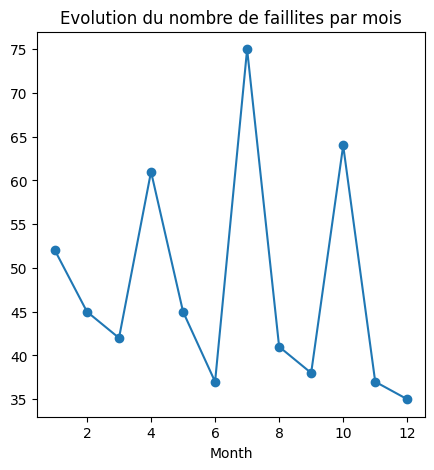

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))


failures_month.plot(kind='line',marker='o')
plt.title('Evolution du nombre de faillites par mois')
plt.show()

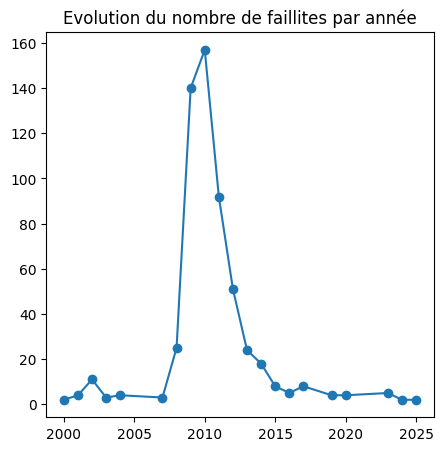

In [ ]:
fix,ax = plt.subplots(figsize=(5,5))
ax.plot(failures_year,marker='o')
ax.set_title('Evolution du nombre de faillites par année')
plt.show()

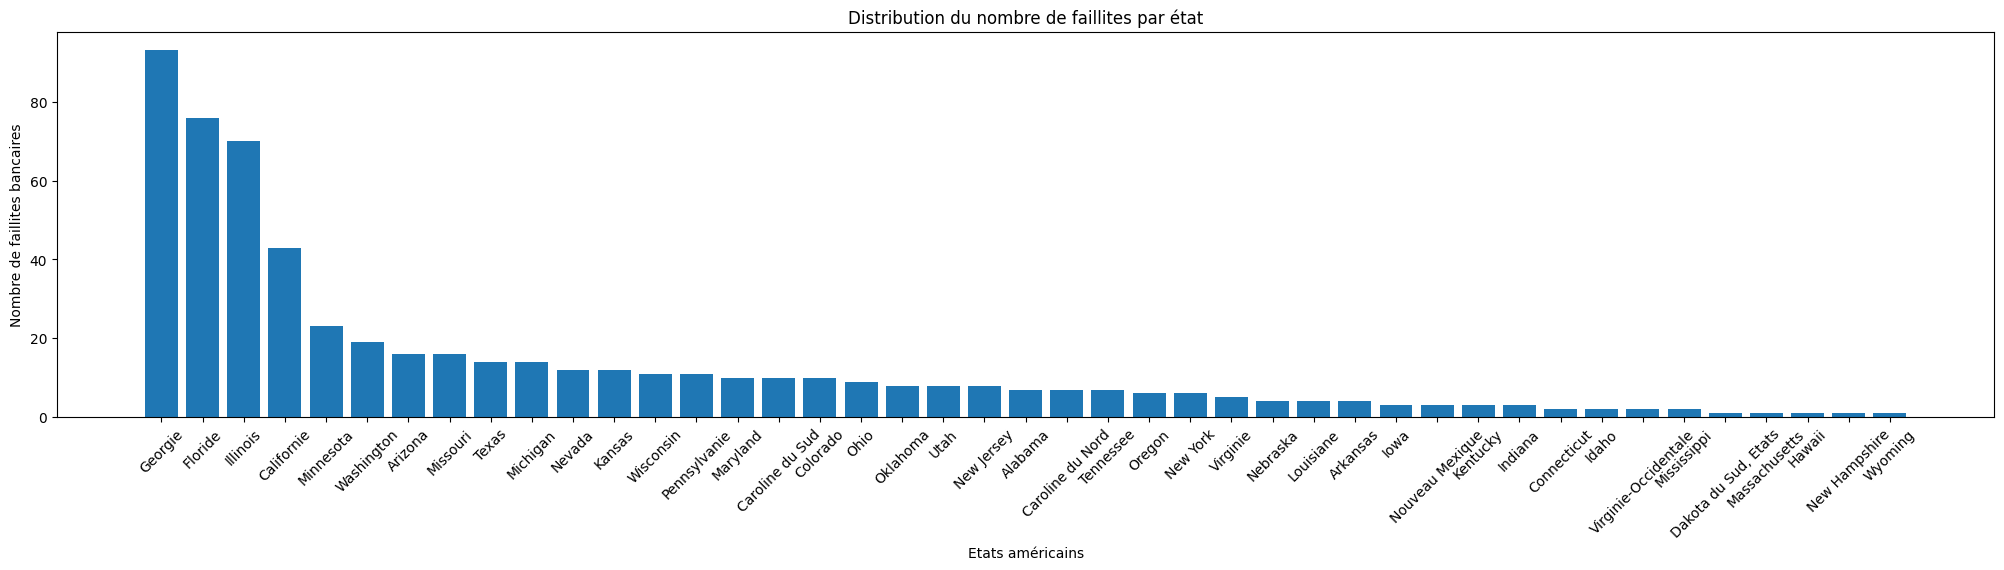

In [ ]:
fix,ax = plt.subplots(figsize=(25,5))
ax.bar(failures_states.index, failures_states.values)
ax.set_title('Distribution du nombre de faillites par état')
ax.set_xlabel('Etats américains')
ax.set_ylabel('Nombre de faillites bancaires')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
dfailures.to_excel("US_banks_failures.xlsx", index = False)
files.download('US_banks_failures.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

II - NETTOYAGE RETRAITEMENT ET FUSION DE FICHIERS BANKFOCUS ET FAILLITES

II.a Nettoyage

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files

# Ouverture du fichier 'Aggregated.xslx'
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# dfaggregated = pd.read_excel(filename)

IndexError: list index out of range

In [ ]:
dfaggregated.head(2)
# dfaggregated['Country ISO code'] = dfaggregated['Country ISO code'].astype(str)
# dfaggregated['Country ISO code'] = dfaggregated['Country ISO code'].replace({"NA":"NAM"})
dfaggregated.loc[dfaggregated['Country ISO code']=='NAM'].head(2)

,Company name Latin alphabet,BvD bank index number,Consolidation code,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,Accounting practice\nLast avail. yr,Net interest income (expense)\nm LCU Year - 2,...,GUO - Direct %,GUO - Total %,GUO - Information date,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
265,AGRICULTURAL BANK OF NAMIBIA - AGRIBANK,48729.0,U1,2022-03-31,2023-03-31,2024-03-31,IFRS,IFRS,IFRS,202.13,...,NaN,NaN,NaN,Unqualified,Unqualified,Unqualified,26.385,15.25,19.91,1.052556
2510,BANK BIC NAMIBIA HOLDINGS LIMITED,22106.0,U2,2019-12-31,2020-12-31,2021-12-31,IFRS,IFRS,IFRS,n.a.,...,MO,n.a.,11/2023,Audited,Unqualified,Audited,n.a.,n.a.,n.a.,n.a.


In [ ]:
# Nettoyage - suppression des colonnes 'Moddy's', 'GUO'

cols_to_drop = [col for col in dfaggregated.columns if col.startswith(("Moody's", "GUO"))]
dfaggregated.drop(columns=cols_to_drop, inplace=True)

In [ ]:

col = [col for col in dfaggregated.columns if col.startswith("Total assets")]
dfaggregated['Total assets\nm USD Last avail. yr'].describe()
dfaggregated[col].describe()


,Total assets\nm LCU Year - 2,Total assets\nm LCU Year - 1,Total assets\nm LCU Last avail. yr,Total assets\nm USD Last avail. yr
count,59265,59265,59265,59265
unique,52339,55026,54994,55464
top,n.a.,n.a.,n.a.,n.a.
freq,3067,28,60,60


In [ ]:
dfaggregated.head(2)
dfaggregated['BvD bank index number'] = dfaggregated['BvD bank index number'].astype('str')
print(dfaggregated['BvD bank index number'].dtype)

object


In [ ]:
def categorize_bank_size(total_assets):
    if total_assets < 500:
        return "Very_Small"
    elif total_assets < 2000:
        return "Small"
    elif total_assets < 10000:
        return "Medium"
    else:
        return "Large"

In [ ]:
# Variables absolues (montants en millions)
absolute_vars = [
    "Net interest income (expense)\nm LCU Year - 2",
    "Net interest income (expense)\nm LCU Year - 1",
    "Net interest income (expense)\nm LCU Last avail. yr",
    "Net interest income (expense)\nm USD Last avail. yr",
    "Net fee & commission income (expense)\nm LCU Year - 2",
    "Net fee & commission income (expense)\nm LCU Year - 1",
    "Net fee & commission income (expense)\nm LCU Last avail. yr",
    "Net fee & commission income (expense)\nm USD Last avail. yr",
    "Total net trading income (losses) and fair value (FV) gains (losses)\nm LCU Year - 2",
    "Total net trading income (losses) and fair value (FV) gains (losses)\nm LCU Year - 1",
    "Total net trading income (losses) and fair value (FV) gains (losses)\nm LCU Last avail. yr",
    "Total net trading income (losses) and fair value (FV) gains (losses)\nm USD Last avail. yr",
    "Operating Income\nm LCU Year - 2",
    "Operating Income\nm LCU Year - 1",
    "Operating Income\nm LCU Last avail. yr",
    "Operating Income\nm USD Last avail. yr",
    "Total operating expenses\nm LCU Year - 2",
    "Total operating expenses\nm LCU Year - 1",
    "Total operating expenses\nm LCU Last avail. yr",
    "Total operating expenses\nm USD Last avail. yr",
    "Net impairment charges on loans & advances\nm LCU Year - 2",
    "Net impairment charges on loans & advances\nm LCU Year - 1",
    "Net impairment charges on loans & advances\nm LCU Last avail. yr",
    "Net impairment charges on loans & advances\nm USD Last avail. yr",
    "Profit (loss) after tax\nm LCU Year - 2",
    "Profit (loss) after tax\nm LCU Year - 1",
    "Profit (loss) after tax\nm LCU Last avail. yr",
    "Profit (loss) after tax\nm USD Last avail. yr",
    "Net loans & advances to customers\nm LCU Year - 2",
    "Net loans & advances to customers\nm LCU Year - 1",
    "Net loans & advances to customers\nm LCU Last avail. yr",
    "Net loans & advances to customers\nm USD Last avail. yr",
    "Total other earning assets\nm LCU Year - 2",
    "Total other earning assets\nm LCU Year - 1",
    "Total other earning assets\nm LCU Last avail. yr",
    "Total other earning assets\nm USD Last avail. yr",
    "Total customer deposits\nm LCU Year - 2",
    "Total customer deposits\nm LCU Year - 1",
    "Total customer deposits\nm LCU Last avail. yr",
    "Total customer deposits\nm USD Last avail. yr",
    "Wholesale funding\nm LCU Year - 2",
    "Wholesale funding\nm LCU Year - 1",
    "Wholesale funding\nm LCU Last avail. yr",
    "Wholesale funding\nm USD Last avail. yr",
    "Total equity\nm LCU Year - 2",
    "Total equity\nm LCU Year - 1",
    "Total equity\nm LCU Last avail. yr",
    "Total equity\nm USD Last avail. yr",
    "Total assets\nm LCU Year - 2",
    "Total assets\nm LCU Year - 1",
    "Total assets\nm LCU Last avail. yr",
    "Total assets\nm USD Last avail. yr"
]

# Variables ratios/pourcentages
ratio_vars = [
    "Return on average assets (ROAA)\nYear - 2",
    "Return on average assets (ROAA)\nYear - 1",
    "Return on average assets (ROAA)\nLast avail. yr",
    "Return on average equity (ROAE)\nYear - 2",
    "Return on average equity (ROAE)\nYear - 1",
    "Return on average equity (ROAE)\nLast avail. yr",
    "Cost-to-income (Efficiency) ratio\nYear - 2",
    "Cost-to-income (Efficiency) ratio\nYear - 1",
    "Cost-to-income (Efficiency) ratio\nLast avail. yr",
    "Impaired loans / Gross customer loans & advances\nYear - 2",
    "Impaired loans / Gross customer loans & advances\nYear - 1",
    "Impaired loans / Gross customer loans & advances\nLast avail. yr",
    "Loan loss reserves / Impaired loans\nYear - 2",
    "Loan loss reserves / Impaired loans\nYear - 1",
    "Loan loss reserves / Impaired loans\nLast avail. yr",
    "Unreserved impaired loans / Total equity\nYear - 2",
    "Unreserved impaired loans / Total equity\nYear - 1",
    "Unreserved impaired loans / Total equity\nLast avail. yr",
    "Tier 1 ratio (as reported)\nYear - 2",
    "Tier 1 ratio (as reported)\nYear - 1",
    "Tier 1 ratio (as reported)\nLast avail. yr",
    "Total capital adequacy ratio (as reported)\nYear - 2",
    "Total capital adequacy ratio (as reported)\nYear - 1",
    "Total capital adequacy ratio (as reported)\nLast avail. yr",
    "Total equity / Total assets\nYear - 2",
    "Total equity / Total assets\nYear - 1",
    "Total equity / Total assets\nLast avail. yr",
    "Loans & advances to customers / Deposits & short-term funding\nYear - 2",
    "Loans & advances to customers / Deposits & short-term funding\nYear - 1",
    "Loans & advances to customers / Deposits & short-term funding\nLast avail. yr",
    "Liquid assets / Deposits & short-term funding\nYear - 2",
    "Liquid assets / Deposits & short-term funding\nYear - 1",
    "Liquid assets / Deposits & short-term funding\nLast avail. yr",
    "Basel III Liquidity Coverage Ratio (LCR) (as reported)\nYear - 2",
    "Basel III Liquidity Coverage Ratio (LCR) (as reported)\nYear - 1",
    "Basel III Liquidity Coverage Ratio (LCR) (as reported)\nLast avail. yr"
]

numeric_cols = dfailures.select_dtypes(include=['int64', 'float64']).columns.tolist()
date_cols = dfailures.select_dtypes(include=['datetime64']).columns.tolist()

In [ ]:
for col_abs in absolute_vars:
  dfaggregated[col_abs] = pd.to_numeric(dfaggregated[col_abs],errors='coerce')
for col_rat in ratio_vars:
  dfaggregated[col_rat] = pd.to_numeric(dfaggregated[col_rat],errors='coerce')

In [ ]:
dfaggregated['size_cat'] = dfaggregated['Total assets\nm USD Last avail. yr'].apply(lambda a : categorize_bank_size(a))
dfaggregated['size_cat'].describe()

dernière_col = dfaggregated.columns[-1]
dfaggregated.insert(2,dernière_col,dfaggregated.pop(dernière_col))

In [ ]:
# REMPLACEMENT DES NAN PAR LA VALEUR MEDIANE ET PAR TAILLE/PAYS

# Pour les montants absolus : médiane par taille
for col in absolute_vars:
    dfaggregated[col] = dfaggregated.groupby('size_cat')[col][Country].transform(lambda x: x.fillna(x.median()))

# REMPLACEMENT DES NAN PAR LA VALEUR MEDIANE GLOBALE

# Pour les ratios : médiane globale (plus stable)
for col in ratio_vars:
    dfaggregated[col] = dfaggregated[col].fillna(dfaggregated[col].median())

In [ ]:
dfaggregated.isna().sum()

,0
Company name Latin alphabet,3258
BvD bank index number,0
size_cat,0
Consolidation code,3258
Closing date\nYear - 2,6299
...,...
Audit status\nYear - 2.1,6299
Total off-balance sheet exposure\nm LCU Year - 2,3258
Total off-balance sheet exposure\nm LCU Year - 1,3258
Total off-balance sheet exposure\nm LCU Last avail. yr,3258


In [ ]:
# Ouverture du fichier 'Consolidation'

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfconsolidation = pd.read_excel(filename)

Saving Consolidation.xlsx to Consolidation (1).xlsx


In [ ]:
dfconsolidation.head()

,Consolidation code,Rank
0,C1,1
1,C2,2
2,C*,3
3,U1,4
4,U2,5


In [ ]:
dfaggregated = pd.merge(dfaggregated,dfconsolidation,how='left',on='Consolidation code')

In [ ]:
dfaggregated['Consolidation code'].value_counts()

,count
Consolidation code,
U1,26975
C1,13831
U2,6165
C2,6080
U*,3709
C*,2503
LF,2


In [ ]:
dfaggregated.insert(2, 'Rank', dfaggregated.pop('Rank'))
dfaggregated.head(2)



,Company name Latin alphabet,BvD bank index number,Rank,size_cat,Consolidation code,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
0,"100% BANCO, BANCO UNIVERSAL, C.A",49502.0,4.0,Very_Small,U1,2022-12-31,2023-12-31,2024-12-31,Local GAAP,Local GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,n.a.,n.a.,n.a.,n.a.
1,11021265 CANADA INC.,48596.0,1.0,Small,C1,2016-12-31,2017-12-31,2018-12-31,Local GAAP,Local GAAP,...,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,n.a.,n.a.,n.a.,n.a.


In [ ]:
dfaggregated.loc[dfaggregated['Consolidation code']=='C*'].head()

,Company name Latin alphabet,BvD bank index number,Rank,size_cat,Consolidation code,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
9,1ST SOURCE CORPORATION,13121.0,3.0,Medium,C*,2022-12-31,2023-12-31,2024-12-31,US GAAP,US GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,1276.454,1502.447,1348.705,1348.705
17,"365.BANK, A. S.",25992.0,3.0,Medium,C*,2022-12-31,2023-12-31,2024-12-31,IFRS,IFRS,...,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,167.727,115.861,116.747,121.288446
57,ABC HOLDINGS LIMITED,19752.0,3.0,Small,C*,2012-12-31,2013-12-31,2014-12-31,IFRS,IFRS,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,955.037,971.231,1395.716,146.692027
143,"ACE SECURITIES CO., LTD",10773.0,3.0,Very_Small,C*,2018-03-31,2019-03-31,2020-03-31,Local GAAP,Local GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,n.a.,n.a.,n.a.,n.a.
200,AFFIN BANK BERHAD,33218.0,3.0,Large,C*,2022-12-31,2023-12-31,2024-12-31,IFRS,IFRS,...,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,56647.807,87430.95,85186.497,19057.382285


In [ ]:
dfaggregated.head(2)

,Company name Latin alphabet,BvD bank index number,Rank,size_cat,Consolidation code,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
0,"100% BANCO, BANCO UNIVERSAL, C.A",49502.0,4.0,Very_Small,U1,2022-12-31,2023-12-31,2024-12-31,Local GAAP,Local GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,n.a.,n.a.,n.a.,n.a.
1,11021265 CANADA INC.,48596.0,1.0,Small,C1,2016-12-31,2017-12-31,2018-12-31,Local GAAP,Local GAAP,...,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,n.a.,n.a.,n.a.,n.a.


In [ ]:
dfaggregated['Company name Latin alphabet'] = dfaggregated['Company name Latin alphabet'].astype("str")

In [ ]:
def suppression_sigles(texte,sigles):
  for sigle in sigles:
    if texte.endswith(sigle):
      texte = texte.removesuffix(sigle)
  return texte

sigles = ["GESELLSCHAFT M.B.H.","gmbh","GMBH","F.S.B.", "S.A.", "P.S.C.", "(EXTINGUIDA)","LIMITED","S.F.P.","S/A",
            "FCB","KAPITALANLAGEGESELLSCHAFT M.B.H.", "VERTRIEBSGESELLSCHAFT M.B.H.", "GMBH & CO. KG", "B.S.C", "S.A.E.",
            "(CLOSED)", "AKTIENGESELLSCHAFT", "GESELLSCHAFT M.B.H.", "SOCIETE ANONYME", "S.A. DE C.V.", "S.A. DE C.V.", "S.F.P.", "S.A.L", "(PUBLIC JOINT-STOCK COMPANY)", "FSB", "PLC", "CREDIT UNION", "(FSB)",
            ", INC",",INC",",INC.",",INC. ",", INC. ",", INC.","INC","INC ","INC.","INC. "," INC"," INC "," INC."," INC. ", 'S.A.',"A. S.",
            "CO","COMPANY","LLC","LTD",",",'-'," "]
dfaggregated['Company name Latin alphabet_processed'] = dfaggregated['Company name Latin alphabet'].apply(lambda a : suppression_sigles(a,sigles))

enlever les parenthèses, guillemets,'GESELLSCHAFT M.B.H.','-',', S.A., , A. S.,gmbh,GMBH,F.S.B., S.A., P.S.C, (EXTINGUIDA),LIMITED,S.F.P.,S/A,FCB,KAPITALANLAGEGESELLSCHAFT M.B.H., VERTRIEBSGESELLSCHAFT M.B.H., GMBH & CO. KG, B.S.C, S.A.E., (CLOSED), AKTIENGESELLSCHAFT, GESELLSCHAFT M.B.H., SOCIETE ANONYME, S.A. DE C.V., S.A. DE C.V., S.F.P., S.A.L, (PUBLIC JOINT-STOCK COMPANY), FSB, PLC, CREDIT UNION, (FSB),

```
# Ce texte est au format code
```



In [ ]:

dfaggregated.insert(0, 'Company name', dfaggregated.pop('Company name Latin alphabet_processed'))
dfaggregated.head(2)


KeyError: "['Company name Latin alphabet_processed'] not found in axis"

In [ ]:
dfaggregated.loc[dfaggregated['Company name Latin alphabet']=='1ST BANK'].head()
dfaggregated.loc[dfaggregated['Company name Latin alphabet']=='1895 BANCORP OF WISCONSIN, INC.'].head()

,Company name,Company name Latin alphabet,BvD bank index number,Rank,size_cat,Consolidation code,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
61790,1895 BANCORP OF WISCONSIN,"1895 BANCORP OF WISCONSIN, INC.",98094.0,4.0,Very_Small,U1,2022-12-31,2023-12-31,2024-12-31,US GAAP,...,Unaudited,Audited,Audited,Audited,Audited,Unaudited,n.a.,n.a.,n.a.,n.a.


In [ ]:
dfaggregated.drop('Company name Latin alphabet',axis=1,inplace=True)

In [ ]:
dfaggregated.sort_values(by=['Company name','Rank'],ascending=True,inplace=True)
dfaggregated.head()

,Company name,BvD bank index number,Rank,size_cat,Consolidation code,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
7270,'EXPRESSBANK' OPEN JOINT STOCK,50590.0,4.0,Very_Small,U1,2022-12-31,2023-12-31,2024-12-31,IFRS,IFRS,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,18.506,22.841,27.154,15.972942
11442,'MUGANBANK' OPEN JOINT STOCK,14346.0,4.0,Very_Small,U1,2020-12-31,2021-12-31,2022-12-31,IFRS,IFRS,...,Qualified,Qualified,Qualified,Qualified,Qualified,Qualified,62.31,108.895,224.716,132.185888
0,"100% BANCO, BANCO UNIVERSAL, C.A",49502.0,4.0,Very_Small,U1,2022-12-31,2023-12-31,2024-12-31,Local GAAP,Local GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,n.a.,n.a.,n.a.,n.a.
20038,"100% BANCO, BANCO UNIVERSAL, C.A",53057.0,6.0,Very_Small,U*,2020-12-31,2021-12-31,2022-12-31,IFRS,IFRS,...,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,0.004727,0.01274,0.170247,0.009861
1,11021265 CANADA,48596.0,1.0,Small,C1,2016-12-31,2017-12-31,2018-12-31,Local GAAP,Local GAAP,...,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,n.a.,n.a.,n.a.,n.a.


In [ ]:
dfaggregated.drop_duplicates(subset=['Company name'],keep='first',inplace=True)

In [ ]:
dfaggregated.drop(columns=['Rank','Consolidation code'],axis=1,inplace=True)

In [ ]:
dfaggregated.head(2)

,Company name,BvD bank index number,size_cat,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,Accounting practice\nLast avail. yr,Net interest income (expense)\nm LCU Year - 2,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
7270,'EXPRESSBANK' OPEN JOINT STOCK,50590.0,Very_Small,2022-12-31,2023-12-31,2024-12-31,IFRS,IFRS,IFRS,36.358,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,18.506,22.841,27.154,15.972942
11442,'MUGANBANK' OPEN JOINT STOCK,14346.0,Very_Small,2020-12-31,2021-12-31,2022-12-31,IFRS,IFRS,IFRS,6.670,...,Qualified,Qualified,Qualified,Qualified,Qualified,Qualified,62.31,108.895,224.716,132.185888


In [ ]:

dfaggregated['Closing date\nYear - 2'] = dfaggregated['Closing date\nYear - 2'].fillna('Non available')
dfaggregated['Audit status\nYear - 2.1'] = dfaggregated['Audit status\nYear - 2.1'].fillna('Non available')
dfaggregated.isna().sum()

,0
Company name,0
BvD bank index number,0
size_cat,0
Closing date\nYear - 2,0
Closing date\nYear - 1,1
...,...
Audit status\nYear - 2.1,0
Total off-balance sheet exposure\nm LCU Year - 2,1
Total off-balance sheet exposure\nm LCU Year - 1,1
Total off-balance sheet exposure\nm LCU Last avail. yr,1


In [ ]:
dfaggregated.to_excel("dfaggregated_cleaned.xlsx", index = False)
files.download('dfaggregated_cleaned.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Chargement du fichier Country

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfcountry = pd.read_excel(filename)

Saving Country.xlsx to Country (1).xlsx


In [ ]:
dfcountry.head()
dfcountry['Country ISO code'] = dfcountry['Country ISO code'].astype(str)
dfcountry.loc[dfcountry['Country name']=='ETATS-UNIS'].head()

,Country ISO code,Country name
234,US,ETATS-UNIS


In [ ]:
# ouverture du fichier "dfaggregated_cleaned.xlsx"

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfaggregated_cleaned = pd.read_excel(filename)


Saving dfaggregated_cleaned.xlsx to dfaggregated_cleaned (4).xlsx


In [ ]:
dfaggregated_merged = pd.merge(dfaggregated_cleaned,dfcountry,on='Country ISO code',how='left')

In [ ]:
dfaggregated_merged.loc[dfaggregated_merged['Country name']=='ETATS-UNIS'].head()

,Company name,BvD bank index number,size_cat,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,Accounting practice\nLast avail. yr,Net interest income (expense)\nm LCU Year - 2,...,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr,Country name
5,1166 FEDERAL,69724.0,Very_Small,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,0.451938,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,3.832759,3.756567,3.249752,3.249752,ETATS-UNIS
6,1199 SEIU FEDERAL,78046.0,Very_Small,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,2.470813,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,3.740044,6.400704,6.350692,6.350692,ETATS-UNIS
7,121 FINANCIAL,78646.0,Small,2021-12-31 00:00:00,2022-12-31,2023-12-31,US GAAP,US GAAP,US GAAP,19.356078,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,338.64041,316.33633,474.716386,474.716386,ETATS-UNIS
8,15 BEACH MHC,98131.0,Very_Small,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,4.023141,...,Audited,Audited,Audited,Audited,Audited,n.a.,n.a.,n.a.,n.a.,ETATS-UNIS
9,167TH TFR FEDERAL,76060.0,Very_Small,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,1.154122,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,3.485863,3.365423,3.395066,3.395066,ETATS-UNIS


In [ ]:
dfaggregated_merged.insert(3, 'Country name', dfaggregated_merged.pop('Country name'))
dfaggregated_merged.loc[dfaggregated_merged['Country name']=='ETATS-UNIS'].head()

,Company name,BvD bank index number,size_cat,Country name,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,Accounting practice\nLast avail. yr,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
5,1166 FEDERAL,69724.0,Very_Small,ETATS-UNIS,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,3.832759,3.756567,3.249752,3.249752
6,1199 SEIU FEDERAL,78046.0,Very_Small,ETATS-UNIS,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,3.740044,6.400704,6.350692,6.350692
7,121 FINANCIAL,78646.0,Small,ETATS-UNIS,2021-12-31 00:00:00,2022-12-31,2023-12-31,US GAAP,US GAAP,US GAAP,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,338.64041,316.33633,474.716386,474.716386
8,15 BEACH MHC,98131.0,Very_Small,ETATS-UNIS,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,...,Audited,Audited,Audited,Audited,Audited,Audited,n.a.,n.a.,n.a.,n.a.
9,167TH TFR FEDERAL,76060.0,Very_Small,ETATS-UNIS,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,3.485863,3.365423,3.395066,3.395066


In [ ]:
dfaggregated_merged.to_excel("dfaggregated_merged.xlsx", index = False)
files.download('dfaggregated_merged.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ouverture du fichier "dfaggregated_merged.xlsx"

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfaggregated_merged = pd.read_excel(filename)

Saving dfaggregated_merged.xlsx to dfaggregated_merged (1).xlsx


In [ ]:
dfaggregated_merged.loc[dfaggregated_merged['Country ISO code'].isna()]['Country'].head(50)

,Country
44720,NaN


In [ ]:
dfaggregated_merged.head(1)

,Company name,BvD bank index number,size_cat,Country name,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,Accounting practice\nLast avail. yr,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
0,'EXPRESSBANK' OPEN JOINT STOCK,50590.0,Very_Small,AZERBAÏDJAN,2022-12-31 00:00:00,2023-12-31,2024-12-31,IFRS,IFRS,IFRS,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,18.506,22.841,27.154,15.972942


In [ ]:
dfaggregated_merged.tail()

,Company name,BvD bank index number,size_cat,Country name,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,Accounting practice\nLast avail. yr,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
44716,ZWECKVERBANDSSPARKASSE DER STADT BERGKAMEN UND...,13652.0,Small,ALLEMAGNE,2021-12-31 00:00:00,2022-12-31,2023-12-31,Local GAAP,Local GAAP,Local GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,29.334,40.065,65.111,71.947687
44717,ZWECKVERBANDSSPARKASSE DUDERSTADT,43618.0,Small,ALLEMAGNE,2022-12-31 00:00:00,2023-12-31,2024-12-31,Local GAAP,Local GAAP,Local GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,51.933,52.221,37.76,39.22886
44718,ZWECKVERBANDSSPARKASSE HOXTER,14037.0,Medium,ALLEMAGNE,2020-12-31 00:00:00,2021-12-31,2022-12-31,Local GAAP,Local GAAP,Local GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,126.05,173.69,138.631,147.863754
44719,ZWECKVERBANDSSPARKASSE RHON-RENNSTEIG,47079.0,Medium,ALLEMAGNE,2022-12-31 00:00:00,2023-12-31,2024-12-31,Local GAAP,Local GAAP,Local GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,111.744,82.193,76.003,78.959509
44720,NaN,NaN,Large,NaN,Non available,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Non available,NaN,NaN,NaN,NaN


In [ ]:
# Suppression des colonnes en doublon sur les pays

cols_country = [col for col in dfaggregated_merged.columns if col.startswith("Count")]
cols_country
dfaggregated_merged.drop(['Country', 'Country ISO code'],axis=1,inplace=True)

In [ ]:
dfaggregated_merged.loc[dfaggregated_merged['Country name']=="ETATS-UNIS"].head(2)

,Company name,BvD bank index number,size_cat,Country name,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,Accounting practice\nLast avail. yr,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
5,1166 FEDERAL,69724.0,Very_Small,ETATS-UNIS,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,3.832759,3.756567,3.249752,3.249752
6,1199 SEIU FEDERAL,78046.0,Very_Small,ETATS-UNIS,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,3.740044,6.400704,6.350692,6.350692


In [ ]:
# Suppression des colonnes sur les shareholders

cols_to_drop = [col for col in dfaggregated.columns if col.startswith("SH")]
cols_to_drop
dfaggregated_merged.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
dfaggregated_merged.dropna(how='all',inplace=True)
dfaggregated_merged['Company name'] = dfaggregated_merged['Company name'].replace(['', ' ', 'nan', 'NULL', 'None'], pd.NA)
dfaggregated_merged.dropna(subset=['Company name'],inplace=True)

In [ ]:
dfaggregated_merged.isna().sum()

,0
Company name,0
BvD bank index number,0
size_cat,0
Country name,5
Closing date\nYear - 2,0
...,...
Audit status\nYear - 2.1,0
Total off-balance sheet exposure\nm LCU Year - 2,0
Total off-balance sheet exposure\nm LCU Year - 1,0
Total off-balance sheet exposure\nm LCU Last avail. yr,0


In [ ]:
dfaggregated_merged.describe()

,BvD bank index number,Closing date\nYear - 1,Closing date\nLast avail. yr,Net interest income (expense)\nm LCU Year - 2,Net interest income (expense)\nm LCU Year - 1,Net interest income (expense)\nm LCU Last avail. yr,Net interest income (expense)\nm USD Last avail. yr,Net fee & commission income (expense)\nm LCU Year - 2,Net fee & commission income (expense)\nm LCU Year - 1,Net fee & commission income (expense)\nm LCU Last avail. yr,...,Loans & advances to customers / Deposits & short-term funding\nYear - 1,Loans & advances to customers / Deposits & short-term funding\nLast avail. yr,Liquid assets / Deposits & short-term funding\nYear - 2,Liquid assets / Deposits & short-term funding\nYear - 1,Liquid assets / Deposits & short-term funding\nLast avail. yr,Basel III Liquidity Coverage Ratio (LCR) (as reported)\nYear - 2,Basel III Liquidity Coverage Ratio (LCR) (as reported)\nYear - 1,Basel III Liquidity Coverage Ratio (LCR) (as reported)\nLast avail. yr,Exchange rate from original currency\nUSD Year - 1,Exchange rate from original currency\nUSD Last avail. yr
count,44720.000000,44720,44720,4.472000e+04,4.472000e+04,4.472000e+04,44720.000000,4.472000e+04,4.472000e+04,4.472000e+04,...,4.472000e+04,4.472000e+04,4.472000e+04,4.472000e+04,4.472000e+04,44720.000000,44720.000000,4.472000e+04,44720.000000,44720.000000
mean,58525.820930,2017-11-08 06:26:31.985688576,2018-11-15 04:37:08.908765696,4.023593e+04,2.949251e+04,2.355702e+04,133.275871,1.543286e+04,2.312992e+04,3.450241e+04,...,1.433191e+03,1.903981e+03,1.115828e+04,1.821915e+03,1.285495e+04,199.094265,226.409943,2.899180e+02,79.075729,79.068257
min,10002.000000,1990-12-31 00:00:00,1991-12-31 00:00:00,-6.469721e+08,-1.019823e+09,-1.311600e+09,-68010.000000,-6.049392e+06,-4.185155e+06,-4.074929e+06,...,-2.224138e+02,-3.978632e+02,-1.481343e+02,-2.245024e+01,-4.643227e+01,-239.000000,0.000000,-2.323000e+01,0.000024,0.000011
25%,40581.500000,2013-12-31 00:00:00,2014-12-31 00:00:00,3.258500e+00,3.062500e+00,3.173895e+00,2.329000,2.860000e-01,2.500000e-01,2.450000e-01,...,5.944048e+01,5.925569e+01,1.900189e+01,1.785402e+01,1.830872e+01,186.280000,191.000000,1.990000e+02,1.000000,1.000000
50%,64090.500000,2022-12-31 00:00:00,2023-12-31 00:00:00,5.605000e+00,6.623500e+00,6.922000e+00,4.895919,5.162470e-01,6.070000e-01,6.079090e-01,...,7.418470e+01,7.381138e+01,2.901373e+01,2.832288e+01,2.855774e+01,186.280000,191.000000,1.990000e+02,1.000000,1.000000
75%,77733.250000,2023-12-31 00:00:00,2024-12-31 00:00:00,3.809050e+01,4.695717e+01,4.975875e+01,22.683762,6.285014e+00,7.485674e+00,7.833000e+00,...,8.673610e+01,8.619171e+01,4.305281e+01,4.399522e+01,4.372777e+01,186.280000,191.000000,1.990000e+02,1.000000,1.000000
max,99955.000000,2024-12-31 00:00:00,2025-07-16 00:00:00,4.893157e+08,5.098124e+08,6.107186e+08,95114.000000,6.961033e+07,1.148305e+08,2.003689e+08,...,1.871390e+07,5.207710e+07,3.011344e+08,1.215898e+07,4.371601e+08,30465.000000,374800.000000,2.935396e+06,100000.000000,100000.000000
std,23758.826904,NaN,NaN,4.294864e+06,5.971137e+06,7.498121e+06,1558.652066,6.288822e+05,1.001277e+06,1.651515e+06,...,1.017747e+05,2.480043e+05,1.541981e+06,8.507427e+04,2.086326e+06,283.728490,2453.843626,1.391924e+04,2796.497556,2796.497766


In [ ]:
dfaggregated_merged.to_excel("final_aggregated.xlsx", index = False)
files.download('final_aggregated.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Chargement du fichier modifié 'final_aggregated.xlsx'

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df_final_aggregated = pd.read_excel(filename)
df_final_aggregated.head()


Saving final_aggregated.xlsx to final_aggregated (3).xlsx


,Company name,BvD bank index number,size_cat,Country name,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,Accounting practice\nLast avail. yr,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
0,'EXPRESSBANK' OPEN JOINT STOCK,50590,Very_Small,AZERBAÏDJAN,2022-12-31 00:00:00,2023-12-31,2024-12-31,IFRS,IFRS,IFRS,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,18.506,22.841,27.154,15.972942
1,'MUGANBANK' OPEN JOINT STOCK,14346,Very_Small,AZERBAÏDJAN,2020-12-31 00:00:00,2021-12-31,2022-12-31,IFRS,IFRS,IFRS,...,Qualified,Qualified,Qualified,Qualified,Qualified,Qualified,62.31,108.895,224.716,132.185888
2,"100% BANCO, BANCO UNIVERSAL, C.A",49502,Very_Small,VENEZUELA,2022-12-31 00:00:00,2023-12-31,2024-12-31,Local GAAP,Local GAAP,Local GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,Unqualified,n.a.,n.a.,n.a.,n.a.
3,11021265 CANADA,48596,Small,CANADA,2016-12-31 00:00:00,2017-12-31,2018-12-31,Local GAAP,Local GAAP,Local GAAP,...,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,n.a.,n.a.,n.a.,n.a.
4,112 KLEBER SAS,10413,Very_Small,FRANCE,2014-12-31 00:00:00,2015-12-31,2016-12-31,Local GAAP,Local GAAP,Local GAAP,...,Unqualified,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,Unqualified,n.a.,n.a.,n.a.,n.a.


In [ ]:
df_final_aggregated.info()
# 45195 lignes avant nettoyage des noms de banques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44721 entries, 0 to 44720
Columns: 127 entries, Company name to Total off-balance sheet exposure
m USD Last avail. yr
dtypes: datetime64[ns](2), float64(91), object(34)
memory usage: 43.3+ MB


In [ ]:
df_final_aggregated.loc[df_final_aggregated['Company name']=="NEXITY BANK"]['Country name'].head()


,Country name
28663,ETATS-UNIS


Finir de nettoyer le nom des banques : enlever les paranthèses, guillemets,'GESELLSCHAFT M.B.H.','-',', S.A., , A. S.,gmbh,GMBH,F.S.B.,
S.A.,  P.S.C,  (EXTINGUIDA),LIMITED,S.F.P.,S/A,FCB,KAPITALANLAGEGESELLSCHAFT M.B.H., VERTRIEBSGESELLSCHAFT M.B.H., GMBH & CO. KG, B.S.C,  S.A.E., (CLOSED), AKTIENGESELLSCHAFT, GESELLSCHAFT M.B.H., SOCIETE ANONYME, S.A. DE C.V., S.A. DE C.V., S.F.P.,  S.A.L,  (PUBLIC JOINT-STOCK COMPANY), FSB, PLC,  CREDIT UNION, (FSB),

IMPORTER LE FICHIER GLOBAL_FAILURES (, A FSB) ET FAIRE LES MEMES NETTOYAGE DES NOMS MERGER ET CREER

In [ ]:
# Chargement du fichier modifié 'Global_failures.xlsx'

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfGlobal_failures = pd.read_excel(filename)
dfGlobal_failures.head()

Saving Global_failures.xlsx to Global_failures.xlsx


,Bank Name,Country,Continent
0,Colonial Bank,ETATS-UNIS,AMERIQUE DU NORD
1,CapitalSouth Bank,ETATS-UNIS,AMERIQUE DU NORD
2,New South Federal Savings Bank,ETATS-UNIS,AMERIQUE DU NORD
3,First Lowndes Bank,ETATS-UNIS,AMERIQUE DU NORD
4,Nexity Bank,ETATS-UNIS,AMERIQUE DU NORD


In [ ]:
dfGlobal_failures['Bank Name processed'] = dfGlobal_failures['Bank Name'].apply(lambda a : suppression_sigles(a.upper(),sigles))
dfGlobal_failures['Country'] = dfGlobal_failures['Country'].str.upper()

In [ ]:
dfGlobal_failures['Bank Name'] = dfGlobal_failures['Bank Name processed']
dfGlobal_failures.drop('Bank Name processed',axis=1,inplace=True)
dfGlobal_failures['Failure']='yes'
dfGlobal_failures.head()

,Bank Name,Country,Continent,Failure
0,COLONIAL BANK,ETATS-UNIS,AMERIQUE DU NORD,yes
1,CAPITALSOUTH BANK,ETATS-UNIS,AMERIQUE DU NORD,yes
2,NEW SOUTH FEDERAL SAVINGS BANK,ETATS-UNIS,AMERIQUE DU NORD,yes
3,FIRST LOWNDES BANK,ETATS-UNIS,AMERIQUE DU NORD,yes
4,NEXITY BANK,ETATS-UNIS,AMERIQUE DU NORD,yes


In [ ]:
dfGlobal_failures['Bank Name'] = dfGlobal_failures['Bank Name processed']
dfGlobal_failures.drop('Bank Name processed',axis=1,inplace=True)

In [ ]:
dfGlobal_failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Bank Name  1135 non-null   object
 1   Country    1135 non-null   object
 2   Continent  1135 non-null   object
 3   Failure    1135 non-null   object
dtypes: object(4)
memory usage: 35.6+ KB


In [ ]:
# Merge entre le fichier des données globles BankFocus et le ficher des faillites bancaires - jointure sur le nom et le pays

In [ ]:
df_final_aggregated_merged = df_final_aggregated.rename(columns={'Company name':'Bank Name'})
df_final_aggregated_merged.loc[df_final_aggregated_merged['Country name']=="ETATS-UNIS"].head(2)
df_final_aggregated_merged.rename(columns={'Country name':'Country'},inplace=True)


,Bank Name,BvD bank index number,size_cat,Country,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,Accounting practice\nLast avail. yr,...,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
5,1166 FEDERAL,69724,Very_Small,ETATS-UNIS,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,3.832759,3.756567,3.249752,3.249752
6,1199 SEIU FEDERAL,78046,Very_Small,ETATS-UNIS,2022-12-31 00:00:00,2023-12-31,2024-12-31,US GAAP,US GAAP,US GAAP,...,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,Unaudited,3.740044,6.400704,6.350692,6.350692


In [ ]:
dfGlobal_failures.loc[dfGlobal_failures['Bank Name']=="NEXITY BANK"].head()

,Bank Name,Country,Continent,Failure
4,NEXITY BANK,ETATS-UNIS,AMERIQUE DU NORD,yes


In [ ]:
df_final_aggregated_merged = df_final_aggregated_merged.merge(dfGlobal_failures,on=['Bank Name','Country'],how='left')
df_final_aggregated_merged.loc[df_final_aggregated_merged['Bank Name']== 'NEXITY BANK'][['Country']].head()

,Country
28675,ETATS-UNIS


In [ ]:

df_final_aggregated_merged.head(2)
df_final_aggregated_merged.loc[df_final_aggregated_merged['Failure']=='yes'].head()
df_final_aggregated_merged['Failure'] = df_final_aggregated_merged['Failure'].fillna('no')


In [ ]:
df_final_aggregated_merged.loc[df_final_aggregated_merged['Failure']=='no'].head()


,Bank Name,BvD bank index number,size_cat,Country,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,Accounting practice\nYear - 2,Accounting practice\nYear - 1,Accounting practice\nLast avail. yr,...,Audit status\nLast avail. yr,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr,Continent,Failure
0,'EXPRESSBANK' OPEN JOINT STOCK,50590,Very_Small,AZERBAÏDJAN,2022-12-31 00:00:00,2023-12-31,2024-12-31,IFRS,IFRS,IFRS,...,Unqualified,Unqualified,Unqualified,Unqualified,18.506,22.841,27.154,15.972942,NaN,no
1,'MUGANBANK' OPEN JOINT STOCK,14346,Very_Small,AZERBAÏDJAN,2020-12-31 00:00:00,2021-12-31,2022-12-31,IFRS,IFRS,IFRS,...,Qualified,Qualified,Qualified,Qualified,62.31,108.895,224.716,132.185888,NaN,no
2,"100% BANCO, BANCO UNIVERSAL, C.A",49502,Very_Small,VENEZUELA,2022-12-31 00:00:00,2023-12-31,2024-12-31,Local GAAP,Local GAAP,Local GAAP,...,Unqualified,Unqualified,Unqualified,Unqualified,n.a.,n.a.,n.a.,n.a.,NaN,no
3,11021265 CANADA,48596,Small,CANADA,2016-12-31 00:00:00,2017-12-31,2018-12-31,Local GAAP,Local GAAP,Local GAAP,...,Audit n.a.,Audit n.a.,Audit n.a.,Audit n.a.,n.a.,n.a.,n.a.,n.a.,NaN,no
4,112 KLEBER SAS,10413,Very_Small,FRANCE,2014-12-31 00:00:00,2015-12-31,2016-12-31,Local GAAP,Local GAAP,Local GAAP,...,Audit n.a.,Audit n.a.,Audit n.a.,Unqualified,n.a.,n.a.,n.a.,n.a.,NaN,no


In [ ]:
df_final_aggregated_merged.drop('Continent',axis=1,inplace=True)
df_final_aggregated_merged.head(2)
df_final_aggregated_merged['Failure'].value_counts()


,count
Failure,
no,44278
yes,462


In [ ]:


df_final_aggregated_merged.to_excel("final_aggregated_merged.xlsx", index = False)
files.download('final_aggregated_merged.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MODELISATION _ MODELE XGBOOST

In [1]:
import pandas as pd
import numpy as np

from google.colab import files

# Ouverture du fichier 'final_aggregated_merged.xlsx'
uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfailures = pd.read_excel(filename)

Saving final_aggregated_merged.xlsx to final_aggregated_merged.xlsx


In [2]:
dfailures.head()

,BvD bank index number,Bank Name,BvD bank index number.1,Faillite Source BankFocus,Faillite source FDIC,Faillite O/N,Nom combiné,City,BvD bank index number.2,size_cat,...,Audit status\nLast avail. yr.1,Audit status\nYear - 1.1,Audit status\nYear - 2.1,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr,Failure,Inactive BankFocus,2nde vérif Marcel
0,49502,"100% BANCO, BANCO UNIVERSAL, C.A",49502,NON,NON,NON,"100% BANCO, BANCO UNIVERSAL, C.A,CARACAS,VENEZ...",CARACAS,49502,Very_Small,...,Unqualified,Unqualified,Unqualified,n.a.,n.a.,n.a.,n.a.,No,No,Non
1,48596,11021265 CANADA,48596,NON,NON,NON,"11021265 CANADA,GLOUCESTER,CANADA",GLOUCESTER,48596,Small,...,Audit n.a.,Audit n.a.,Audit n.a.,n.a.,n.a.,n.a.,n.a.,No,Yes,Non
2,10413,112 KLEBER SAS,10413,NON,NON,NON,"112 KLEBER SAS,RUEIL MALMAISON,FRANCE",RUEIL MALMAISON,10413,Very_Small,...,Audit n.a.,Audit n.a.,Unqualified,n.a.,n.a.,n.a.,n.a.,No,Yes,Non
3,69724,1166 FEDERAL,69724,NON,NON,NON,"1166 FEDERAL,SWEDESBORO,ETATS-UNIS",SWEDESBORO,69724,Very_Small,...,Unaudited,Unaudited,Unaudited,3.832759,3.756567,3.249752,3.249752,No,No,Non
4,78046,1199 SEIU FEDERAL,78046,NON,NON,NON,"1199 SEIU FEDERAL,NEW YORK,ETATS-UNIS",NEW YORK,78046,Very_Small,...,Unaudited,Unaudited,Unaudited,3.740044,6.400704,6.350692,6.350692,No,No,Non


In [3]:
dfailures.drop(['Faillite Source BankFocus','Faillite source FDIC','Nom combiné','BvD bank index number.1'],axis=1,inplace=True)
dfailures.drop(['Inactive BankFocus','2nde vérif Marcel','Failure','BvD bank index number.2'],axis=1,inplace=True)
dfailures.drop(['Audit status\nLast avail. yr.1','Audit status\nYear - 1.1','Audit status\nYear - 2.1'],axis=1,inplace=True)

In [4]:
dfailures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44720 entries, 0 to 44719
Columns: 121 entries, BvD bank index number to Total off-balance sheet exposure
m USD Last avail. yr
dtypes: datetime64[ns](2), float64(90), int64(1), object(28)
memory usage: 41.3+ MB


In [5]:
dfailures.isna().sum()

,0
BvD bank index number,0
Bank Name,0
Faillite O/N,0
City,0
size_cat,0
...,...
Audit status\nLast avail. yr,0
Total off-balance sheet exposure\nm LCU Year - 2,0
Total off-balance sheet exposure\nm LCU Year - 1,0
Total off-balance sheet exposure\nm LCU Last avail. yr,0


In [6]:
dfailures['Year'] = pd.to_datetime(dfailures['Closing date\nLast avail. yr']).dt.year
failures_year = dfailures[dfailures['Faillite O/N']=="OUI"].groupby('Year').size()
failures_countries  = dfailures[dfailures['Faillite O/N']=="OUI"].groupby('Country').size().sort_values(ascending=False)
failures_countries

,0
Country,
ETATS-UNIS,597
RUSSIE,412
UKRAINE,106
ROYAUME-UNI,25
ALLEMAGNE,21
...,...
OUZBEKISTAN,1
NOUVELLE-ZELANDE,1
NORVEGE,1


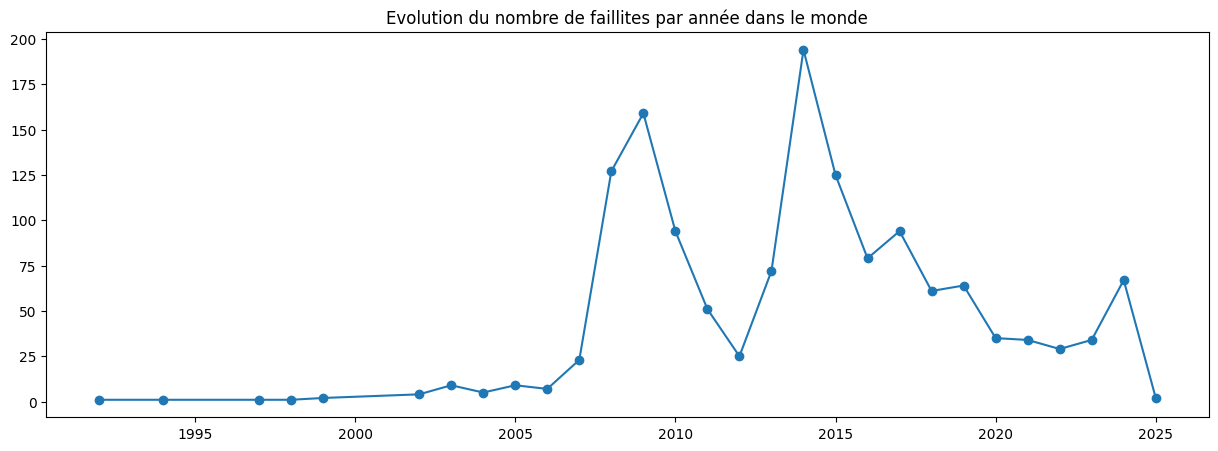

In [7]:
import matplotlib.pyplot as plt
fix,ax = plt.subplots(figsize=(15,5))
ax.plot(failures_year,marker='o')
ax.set_title('Evolution du nombre de faillites par année dans le monde')
plt.show()

In [8]:
import plotly.express as px

# Graphique linéaire interactif
fig = px.line(x=failures_year.index,
              y=failures_year.values,
              labels={'x': 'Année', 'y': 'Nombre de faillites'},
              title='Evolution du nombre de faillites par année dans le monde',
              markers=True)

fig.update_traces(line_color='#1f77b4', line_width=3, marker=dict(size=8))
fig.show()

In [9]:
import plotly.express as px

fig = px.bar(x=failures_countries.index,
             y=failures_countries.values,
             labels={'x': 'Pays', 'y': 'Nombre de faillites bancaires'},
             title='Distribution du nombre de faillites par pays')

fig.update_layout(
    xaxis_tickangle=-45,
    height=500,
    width=1500
)

fig.show()

In [10]:
dfailures.drop('Year',axis=1,inplace=True)

In [11]:
dfailures.head()

,BvD bank index number,Bank Name,Faillite O/N,City,size_cat,Country,Activity_field,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,...,Net interest margin (interest earning assets)\nYear - 2,Net interest margin (interest earning assets)\nYear - 1,Net interest margin (interest earning assets)\nLast avail. yr,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
0,49502,"100% BANCO, BANCO UNIVERSAL, C.A",NON,CARACAS,Very_Small,VENEZUELA,investment_banks,2022-12-31 00:00:00,2023-12-31,2024-12-31,...,28.749907,41.576682,23.391326,Unqualified,Unqualified,Unqualified,n.a.,n.a.,n.a.,n.a.
1,48596,11021265 CANADA,NON,GLOUCESTER,Small,CANADA,commercial_banks,2016-12-31 00:00:00,2017-12-31,2018-12-31,...,0.467271,0.606706,1.284468,Audit n.a.,Audit n.a.,Audit n.a.,n.a.,n.a.,n.a.,n.a.
2,10413,112 KLEBER SAS,NON,RUEIL MALMAISON,Very_Small,FRANCE,investment_banks,2014-12-31 00:00:00,2015-12-31,2016-12-31,...,-2.407932,-1.828499,n.a.,Unqualified,Audit n.a.,Audit n.a.,n.a.,n.a.,n.a.,n.a.
3,69724,1166 FEDERAL,NON,SWEDESBORO,Very_Small,ETATS-UNIS,cooperative_banks,2022-12-31 00:00:00,2023-12-31,2024-12-31,...,2.154165,2.501508,2.876683,Unaudited,Unaudited,Unaudited,3.832759,3.756567,3.249752,3.249752
4,78046,1199 SEIU FEDERAL,NON,NEW YORK,Very_Small,ETATS-UNIS,cooperative_banks,2022-12-31 00:00:00,2023-12-31,2024-12-31,...,2.838562,3.400537,4.063844,Unaudited,Unaudited,Unaudited,3.740044,6.400704,6.350692,6.350692


In [12]:
dfailures = dfailures.replace('n.a.',np.nan)
dfailures=dfailures.dropna()


/tmp/ipython-input-1868245310.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [13]:
colonnes_dates = dfailures.select_dtypes(include=['datetime64']).columns.tolist()
colonnes_cat = dfailures.select_dtypes(include=['object', 'category']).columns.tolist()
colonnes_num = dfailures.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [14]:
dfailures.describe()

,BvD bank index number,Closing date\nYear - 1,Closing date\nLast avail. yr,Net interest income (expense)\nm LCU Year - 2,Net interest income (expense)\nm LCU Year - 1,Net interest income (expense)\nm LCU Last avail. yr,Net interest income (expense)\nm USD Last avail. yr,Net fee & commission income (expense)\nm LCU Year - 2,Net fee & commission income (expense)\nm LCU Year - 1,Net fee & commission income (expense)\nm LCU Last avail. yr,...,Pre-impairment operating profit\nm LCU Year - 1,Pre-impairment operating profit\nm LCU Last avail. yr,Pre-impairment operating profit\nm USD Last avail. yr,Net interest margin (interest earning assets)\nYear - 2,Net interest margin (interest earning assets)\nYear - 1,Net interest margin (interest earning assets)\nLast avail. yr,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
count,29134.000000,29134,29134,2.913400e+04,2.913400e+04,2.913400e+04,29134.000000,2.913400e+04,2.913400e+04,2.913400e+04,...,2.913400e+04,2.913400e+04,29134.000000,29134.000000,29134.000000,2.913400e+04,2.913400e+04,2.913400e+04,2.913400e+04,2.913400e+04
mean,58105.164584,2018-09-14 02:04:09.605272064,2019-09-20 23:56:11.648246016,5.145526e+04,3.823828e+04,2.715167e+04,175.878244,2.106287e+04,3.212424e+04,4.834351e+04,...,9.287769e+04,1.662102e+05,132.913866,1.235416,1.915268,-2.051901e+03,1.752128e+06,2.310765e+06,2.470720e+06,3.808697e+03
min,10002.000000,1991-12-31 00:00:00,1992-12-31 00:00:00,-6.469721e+08,-1.019823e+09,-1.311600e+09,-31191.843410,-6.049392e+06,-4.185155e+06,-4.074929e+06,...,-1.093307e+09,-1.407590e+09,-33474.620952,-62300.000000,-32588.674276,-5.662785e+07,-1.019070e+06,-1.513473e+06,-2.215701e+06,-2.429497e+03
25%,44117.250000,2014-12-31 00:00:00,2015-12-31 00:00:00,2.078263e+00,2.315000e+00,2.383329e+00,2.205411,1.660000e-01,1.660000e-01,1.638061e-01,...,2.850000e-01,2.402405e-01,0.234080,2.252153,2.449708,2.460240e+00,5.814000e+00,6.112234e+00,5.948710e+00,4.834250e+00
50%,64608.500000,2023-12-31 00:00:00,2024-12-31 00:00:00,8.830000e+00,9.718000e+00,1.011850e+01,8.669810,1.019000e+00,1.043000e+00,1.052000e+00,...,3.143500e+00,3.093000e+00,2.764105,3.211921,3.369676,3.409749e+00,3.768700e+01,3.976332e+01,4.037800e+01,3.214289e+01
75%,73917.750000,2023-12-31 00:00:00,2024-12-31 00:00:00,4.488242e+01,5.029400e+01,5.244425e+01,32.504451,7.900250e+00,8.125750e+00,8.488000e+00,...,2.164700e+01,2.224625e+01,14.438750,4.018044,4.199423,4.269477e+00,2.778155e+02,2.941592e+02,3.003351e+02,1.810618e+02
max,99955.000000,2024-12-31 00:00:00,2025-07-16 00:00:00,4.893157e+08,5.098124e+08,6.107186e+08,95114.000000,6.961033e+07,1.148305e+08,2.003689e+08,...,1.181875e+09,2.063438e+09,85761.000000,4610.928591,7078.819810,3.997143e+03,1.735362e+10,1.382468e+10,1.029621e+10,4.382596e+06
std,21822.848175,NaN,NaN,5.304742e+06,7.339091e+06,9.233515e+06,1771.366342,7.560385e+05,1.209376e+06,1.997101e+06,...,1.048392e+07,1.631551e+07,1459.881127,368.297873,252.493346,3.322824e+05,1.102511e+08,1.142058e+08,1.031128e+08,5.673616e+04


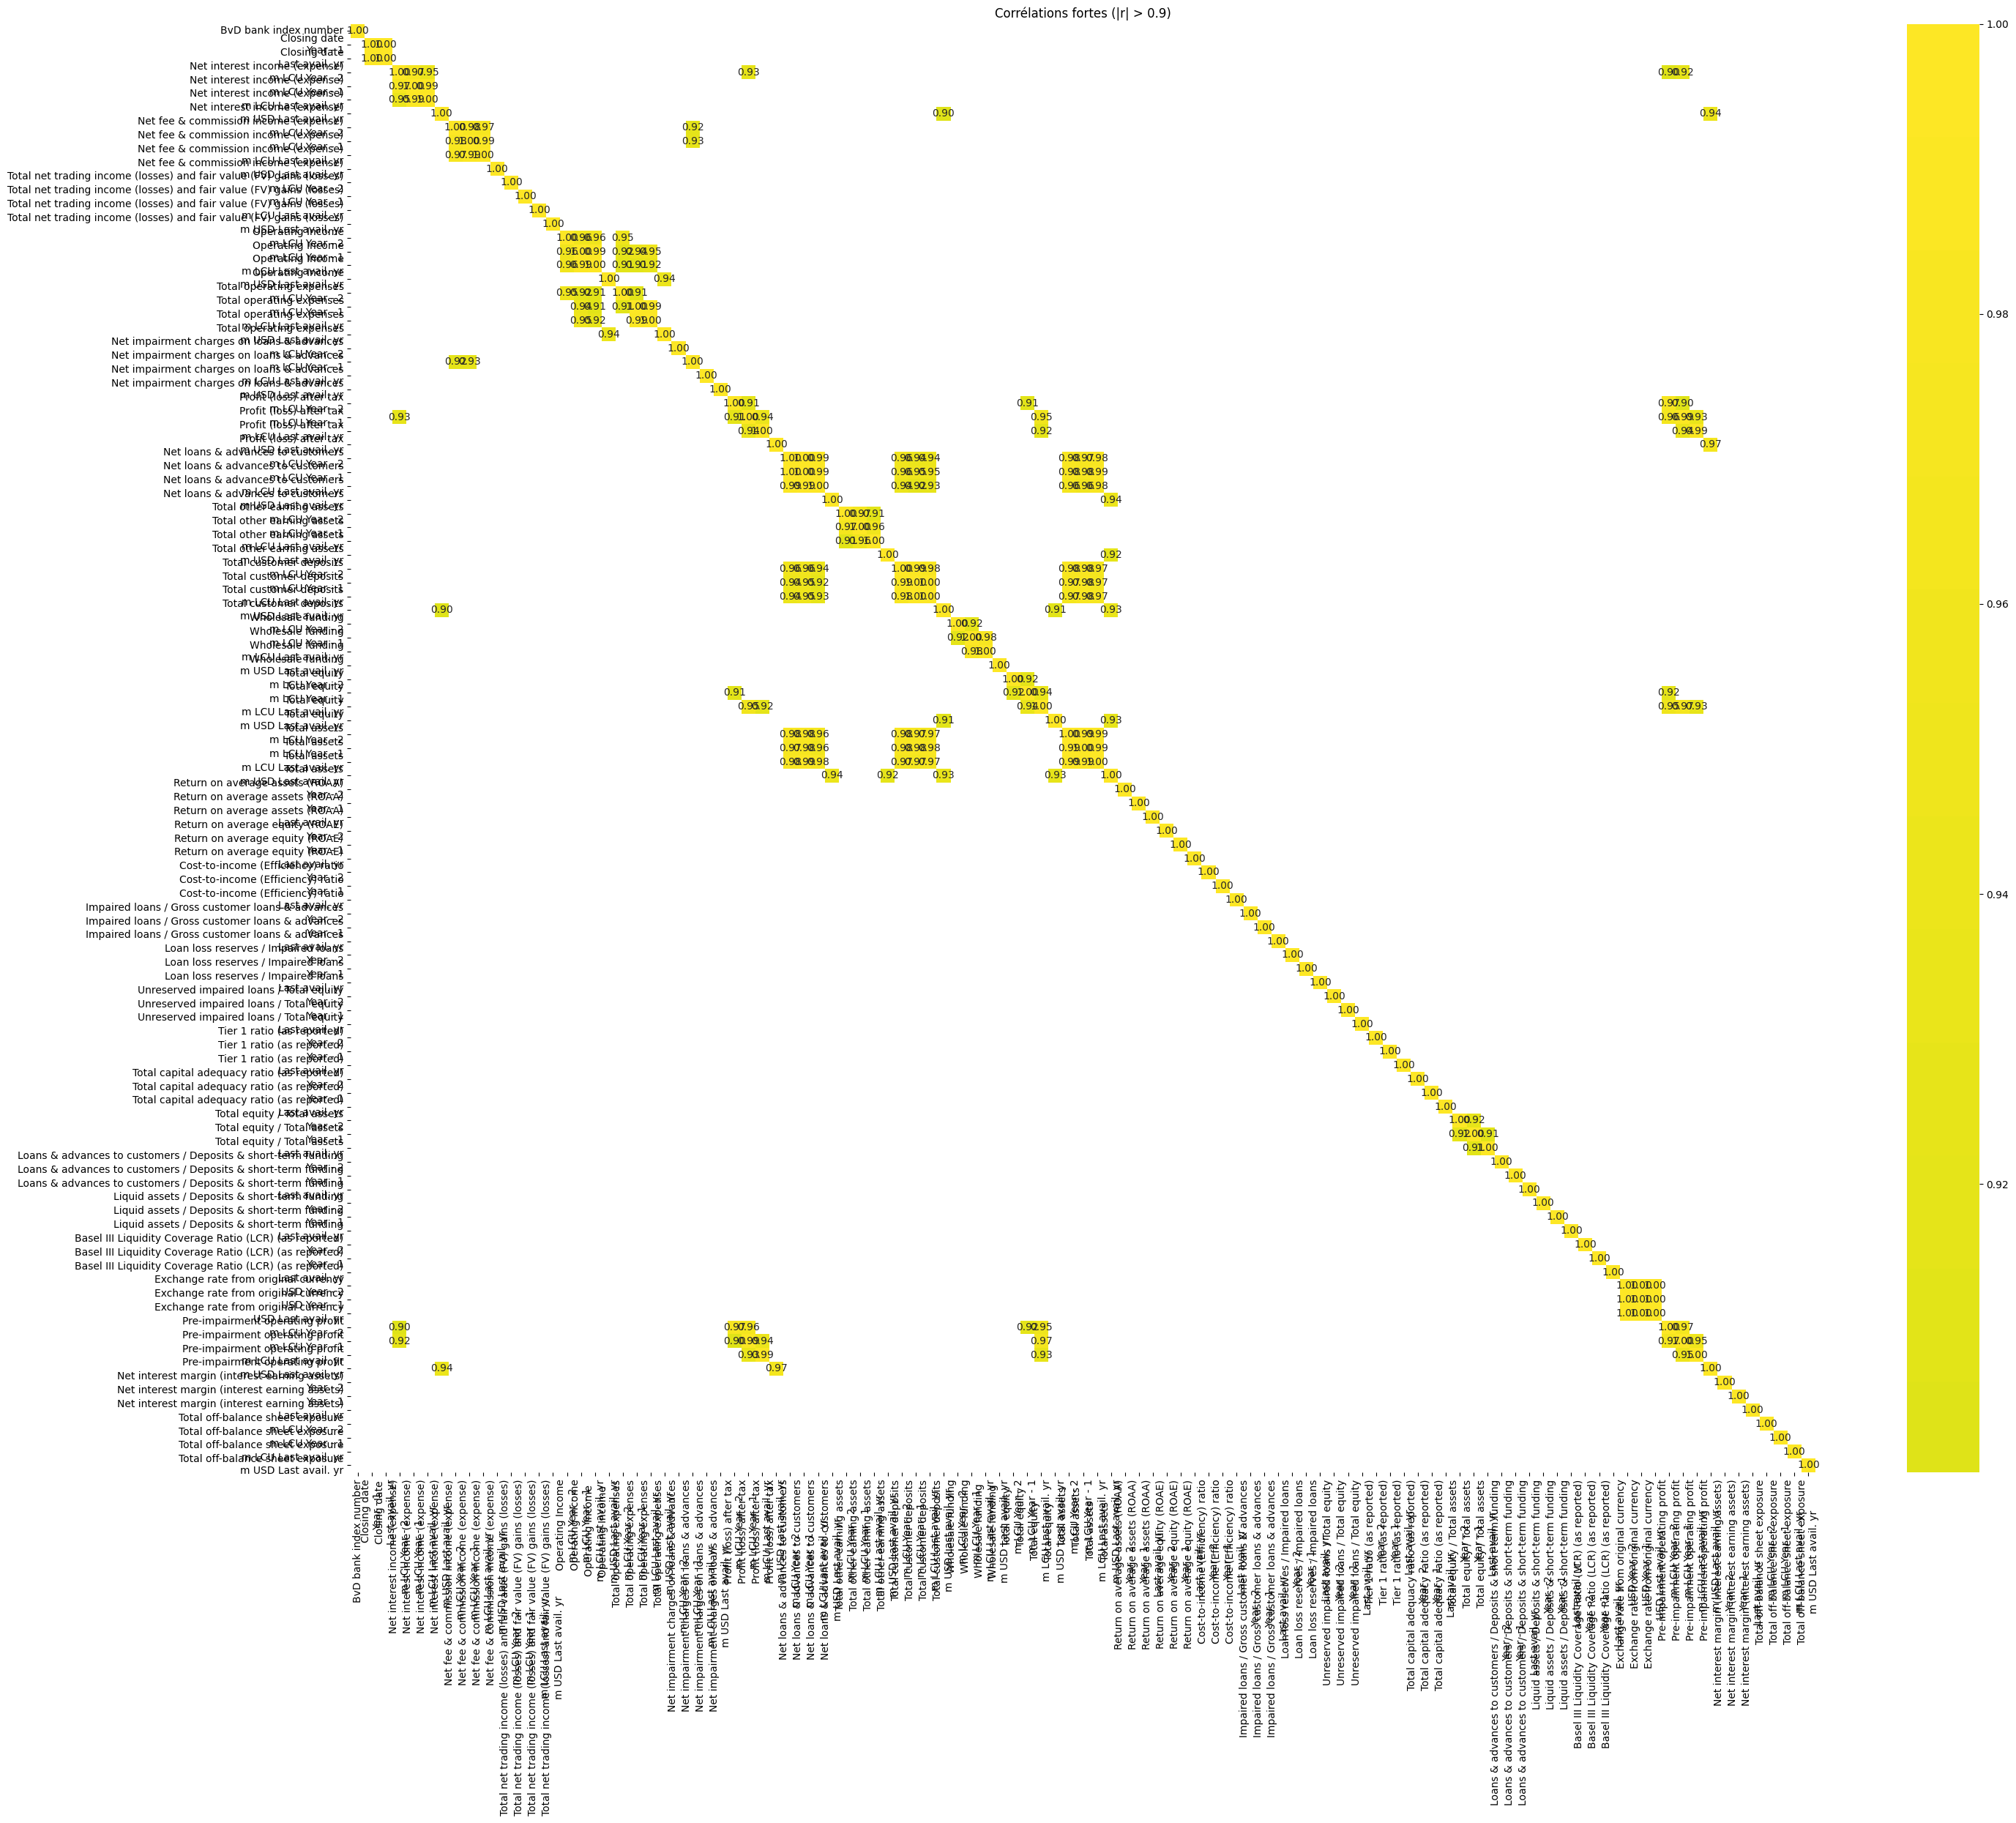

In [16]:
import seaborn as sns
dfailures_corr = dfailures.copy()
dfailures_corr = dfailures_corr.drop(colonnes_cat,axis=1)
correlation_matrix = dfailures_corr.corr()


plt.figure(figsize=(30, 25))
mask = np.abs(correlation_matrix) < 0.9
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='viridis',
            center=0)
plt.title('Corrélations fortes (|r| > 0.9)')
plt.tight_layout()
plt.show()

In [17]:
dfailures.head()

,BvD bank index number,Bank Name,Faillite O/N,City,size_cat,Country,Activity_field,Closing date\nYear - 2,Closing date\nYear - 1,Closing date\nLast avail. yr,...,Net interest margin (interest earning assets)\nYear - 2,Net interest margin (interest earning assets)\nYear - 1,Net interest margin (interest earning assets)\nLast avail. yr,Audit status\nYear - 2,Audit status\nYear - 1,Audit status\nLast avail. yr,Total off-balance sheet exposure\nm LCU Year - 2,Total off-balance sheet exposure\nm LCU Year - 1,Total off-balance sheet exposure\nm LCU Last avail. yr,Total off-balance sheet exposure\nm USD Last avail. yr
3,69724,1166 FEDERAL,NON,SWEDESBORO,Very_Small,ETATS-UNIS,cooperative_banks,2022-12-31 00:00:00,2023-12-31,2024-12-31,...,2.154165,2.501508,2.876683,Unaudited,Unaudited,Unaudited,3.832759,3.756567,3.249752,3.249752
4,78046,1199 SEIU FEDERAL,NON,NEW YORK,Very_Small,ETATS-UNIS,cooperative_banks,2022-12-31 00:00:00,2023-12-31,2024-12-31,...,2.838562,3.400537,4.063844,Unaudited,Unaudited,Unaudited,3.740044,6.400704,6.350692,6.350692
5,78646,121 FINANCIAL,NON,JACKSONVILLE,Small,ETATS-UNIS,cooperative_banks,2021-12-31 00:00:00,2022-12-31,2023-12-31,...,3.190932,3.967310,4.266662,Unaudited,Unaudited,Unaudited,338.640410,316.336330,474.716386,474.716386
7,76060,167TH TFR FEDERAL,NON,MARTINSBURG,Very_Small,ETATS-UNIS,cooperative_banks,2022-12-31 00:00:00,2023-12-31,2024-12-31,...,1.689350,2.649678,3.399278,Unaudited,Unaudited,Unaudited,3.485863,3.365423,3.395066,3.395066
10,42845,1867 WESTERN FINANCIAL CORPORATION,NON,STOCKTON,Medium,ETATS-UNIS,bank_holding_companies,2022-12-31 00:00:00,2023-12-31,2024-12-31,...,3.097090,2.978964,3.129304,Audited,Audited,Audited,643.918000,689.823000,632.944000,632.944000


In [18]:
from sklearn.preprocessing import LabelEncoder
le_label = LabelEncoder()
dfailures['Faillite O/N'] = le_label.fit_transform(dfailures['Faillite O/N'])


In [19]:
# encodage avec other


dfailures['City'] = dfailures['City'].astype('str')
cat_columns = ['Bank Name','Faillite O/N','City','size_cat','Country','Activity_field']
date_columns = ['Closing date\nLast avail. yr','Closing date\nYear - 1','Closing date\nYear - 2','Accounting practice\nYear - 1','Accounting practice\nYear - 2',
                'Accounting practice\nLast avail. yr','Audit status\nLast avail. yr','Audit status\nYear - 1','Audit status\nYear - 2',
                'Original currency\nYear - 2','Original currency\nYear - 1','Original currency\nLast avail. yr']

from sklearn.preprocessing import OneHotEncoder
dfailures.columns = dfailures.columns.str.replace('\n', '_').str.replace(' ', '_').str.strip()
cat_columns = [col.replace('\n', '_').replace(' ', '_').strip() for col in cat_columns]

ohe = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')
encoded_array = ohe.fit_transform(dfailures[cat_columns])

encoded_columns = ohe.get_feature_names_out(cat_columns)
df_encoded = pd.DataFrame(
    encoded_array,
    columns=encoded_columns,
    index=dfailures.index
)

In [21]:
# df_final = dfailures.drop(columns=colonnes_cat).join(df_encoded)
df_encoded.head()





,Bank_Name_'MUGANBANK' OPEN JOINT STOCK,Bank_Name_1166 FEDERAL,Bank_Name_1199 SEIU FEDERAL,Bank_Name_121 FINANCIAL,Bank_Name_167TH TFR FEDERAL,Bank_Name_1867 WESTERN FINANCIAL CORPORATION,Bank_Name_1880 BANK,Bank_Name_1895 BANCORP OF WISCONSIN,Bank_Name_1NB BANK,Bank_Name_1ST ADVANTAGE BANK,...,Activity_field_islamic_banks,Activity_field_micro_financing_institutions,Activity_field_multi-lateral_development_bank,Activity_field_non-bank holding companies,Activity_field_non-banking credit_institutions,Activity_field_private_banking,Activity_field_real_estate_mortgage_finance,Activity_field_saving_banks,Activity_field_securities_firms,Activity_field_specialized_governmental_credit_institution
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb



# data/Valeur cible
target = dfailures['Faillite O/N']
data = dfailures.drop('Faillite O/N',axis=1)

# encodage de la valeur cible
le_label = LabelEncoder()
target = le_label.fit_transform(target)

# identification des types des colonnes
colonnes_dates = data.select_dtypes(include=['datetime64']).columns.tolist()
colonnes_cat = data.select_dtypes(include=['object', 'category']).columns.tolist()
colonnes_num = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# traitement des dates
for col in colonnes_dates:
    data[col] = pd.to_datetime(data[col])
    data[f'{col}_annee'] = data[col].dt.year
    data[f'{col}_mois'] = data[col].dt.month
    data[f'{col}_jour'] = data[col].dt.day
    data[f'{col}_jour_semaine'] = data[col].dt.dayofweek
data = data.drop(colonnes_dates, axis=1)

# encodage des variables catgégorielles
data['City'] = data['City'].astype('str')

data.columns = data.columns.str.replace('\n', '_').str.replace(' ', '_').str.strip()
colonnes_cat = [col.replace('\n', '_').replace(' ', '_').strip() for col in colonnes_cat]

ohe = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')
encoded_array = ohe.fit_transform(data[colonnes_cat])

colonnes_encoded = ohe.get_feature_names_out(colonnes_cat)
df_encoded = pd.DataFrame(
    encoded_array,
    columns=colonnes_encoded,
    index=data.index)

data = data.drop(colonnes_cat, axis=1)

# Ajouter les nouvelles colonnes encodées
data = pd.concat([data, df_encoded], axis=1)

# train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=1234,shuffle=True,test_size=0.2)

# normalisation des données numériques

scaler = StandardScaler()
X_train[colonnes_num] = scaler.fit_transform(X_train[colonnes_num])
X_test[colonnes_num] = scaler.fit_transform(X_test[colonnes_num])

# entrainement du modèle XGBoost
params = {
    'objective': 'binary:logistic',  # ou 'reg:squarederror' pour régression
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc',  # ou 'rmse' pour régression
    'random_state': 42
}

model = xgb.XGBClassifier(**params)
model.fit( X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Prédictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# évaluations
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


KeyError: 'Faillite O/N'